In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Dataset/sales_predictions_2024.csv")
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976



## **Diccinario de datos:**

**This data set contains the following features:**


**Item_Identifier:** It is a unique product ID assigned to every distinct item. It consists of an alphanumeric string of length 5.

**Item_Weight:** This field includes the weight of the product.

**Item_Fat_Content:** This attribute is categorical and describes whether the product is low fat or not. There are 2 categories of this attribute: ['Low Fat', 'Regular']. However, it is important to note that 'Low Fat' has also been written as 'low fat' and 'LF' in dataset, whereas, 'Regular' has been referred as 'reg' as well.

**Item_Visibility:** This field mentions the percentage of total display area of all products in a store allocated to the particular product.

**Item_Type:** This is a categorical attribute and describes the food category to which the item belongs. There are 16 different categories listed as follows: ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']


**Item_MRP:** This is the Maximum Retail Price (list price) of the product.

**Outlet_Identifier:** It is a unique store ID assigned. It consists of an alphanumeric string of length 6.

**Outlet_Establishment_Year:** This attribute mentions the year in which store was established.

**Outlet_Size:** The attribute tells the size of the store in terms of ground area covered. It is a categorical value and described in 3 categories: ['High', 'Medium', 'Small'].

**Outlet_Location_Type:** This field has categorical data and tells about the size of the city in which the store is located through 3 categories: ['Tier 1', 'Tier 2', 'Tier 3'].

**Outlet_Type:** This field contains categorical value and tells whether the outlet is just a grocery store or some sort of supermarket. Following are the 4 categories in which the data is divided: ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store','Supermarket Type3'].

**Item_Outlet_Sales:** This is the outcome variable to be predicted. It contains the sales of the product in the particulat store.

# **Requerimientos del reto**

* Extraer el dataset "sales_prediction.csv".
* Analisis estadistico exploratorio
* Preprocesamiento:
 * Imputacion (Si aplica).
 * Eliminacion de datos a tipicos.
 * Eliminacion de valores nulos.
 * Eliminar datos duplucados (si aplica).
 * Cambiar tipo de datos (si aplica).
* Seleccion de las variables mas relevante (a critirio propio).
* Graficar la distribucion de estas variables que considere mas importante (minimo 1 boxplot por variable).
* Graficar la correlacion en un mapa de calor usando seaborn heatmap(corr()).
* Eligir el modelo mas apropiado para esta tarea.
* Dividir la data.
* Scarlar (si aplica).
* Entrenar el modelo.
* precedir el resultado.
* crear un dataframe nuevo con los datos de X_test y la prediccion del modelo. Para esto debe crear la columna predict en X_test y pasarle los valores de y_pred.
* Guardar el dataframe nuevo en formato csv.

# **Objectivo:**

El objetivo de esta prueba es poder predecir las ventas "Item_Outlet_Sales" de los diferentes comercias en base a las caracteristicas que el dataset nos ofrece.

In [4]:
df.head( n =10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Calcular la moda de cada columna categorica
moda = df.select_dtypes(include=['object']).mode().iloc[0]

# Reemplazar los valores nulos con la moda
df.fillna(moda, inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
#Configuracion del imputer a media
imputer = SimpleImputer(strategy='mean')

In [8]:
# Seleccionar las columnas numericas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [9]:
# Aplicar el imputer a las columnas numericas
df[num_cols] = imputer.fit_transform(df[num_cols])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987.0,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002.0,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004.0,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
# Convertir variables categoricas en variables dummy (one-hot encoding)
#df = pd.get_dummies(df, drop_first=True)  
# drop_first=True para evitar la multicolinealidad

# Verificar la conversinn
#df

In [11]:
# Identificar frecuencia del feature Item_Fat_Content
frecuencia_item = df['Item_Fat_Content'].value_counts()
frecuencia_item

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [12]:
# Reemplazar Low Fat a LF
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Low Fat','LF')

#Reemplazar Regular a RG
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Regular','RG')

#Reemplazar reg a RG
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg','RG')

#Reemplazar low fat a LF
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','LF')

#Resultado final
frecuencia = df['Item_Fat_Content'].value_counts()
frecuencia

Item_Fat_Content
LF    5517
RG    3006
Name: count, dtype: int64

In [13]:
# Convertir valores object a 1 y 0 - (1 = Low Fat & 0 = Regular)
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({"LF":1,"RG":0})

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
#Conversion datos categoricos en numericos

le = LabelEncoder()

df['Item_Type'] = le.fit_transform(df['Item_Type'])

df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

df['Item_Identifier'] = le.fit_transform(df['Item_Identifier'])

df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 799.2 KB


In [16]:
y = df["Item_Outlet_Sales"]
X = df.drop("Item_Outlet_Sales", axis =1)

In [17]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 8523 entries, 0 to 8522
Series name: Item_Outlet_Sales
Non-Null Count  Dtype  
--------------  -----  
8523 non-null   float64
dtypes: float64(1)
memory usage: 66.7 KB


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   float64
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 732.6 KB


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
# Crear el modelo de regresion lineal
item_prices_model = LinearRegression()

# Entrenar el modelo
item_prices_model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Hacer predicciones en el conjunto de prueba
y_pred = item_prices_model.predict(X_test)

# Calcular metricas de rendimiento
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Absoluto Medio (MAE):',mae)
print(f'Error Cuadrático Medio (MSE):',mse)
print(f'Coeficiente de Determinación (R^2):', r2)

Error Absoluto Medio (MAE): 866.489513586399
Error Cuadrático Medio (MSE): 1349128.4426617206
Coeficiente de Determinación (R^2): 0.5110041504784342


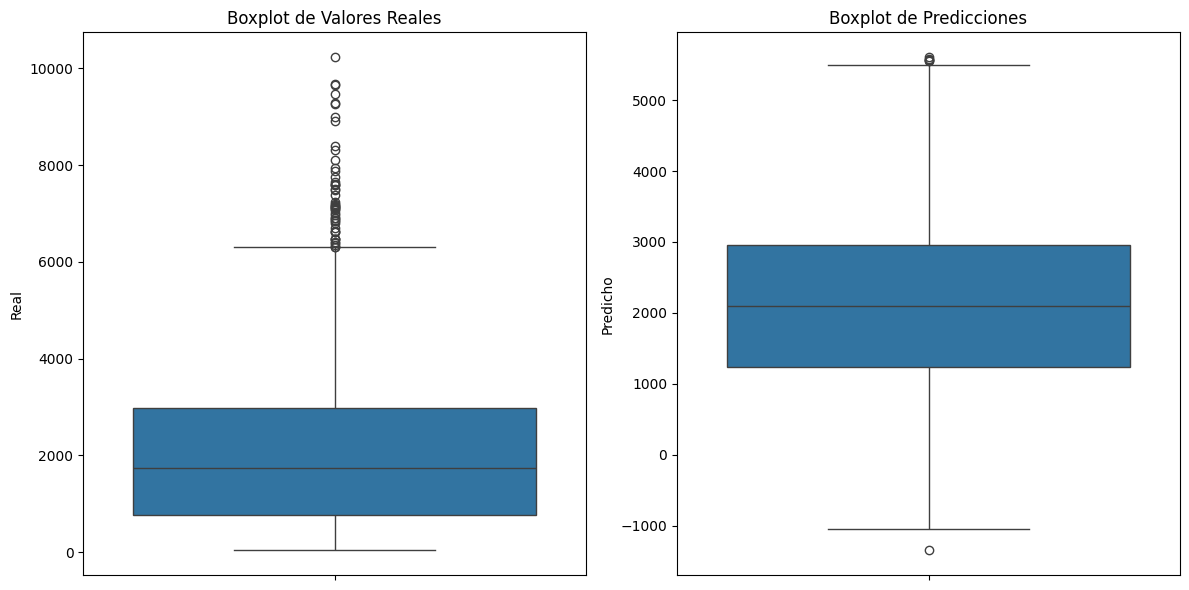

In [52]:
# Crear un DF para los valores reales y las predicciones
results_df = pd.DataFrame({
    'Real': y_test,
    'Predicho': y_pred
})


plt.figure(figsize=(12, 6))

# Boxplot para los valores reales
plt.subplot(1, 2, 1)
sns.boxplot(y=results_df['Real'])
plt.title('Boxplot de Valores Reales')

# Boxplot para las predicciones
plt.subplot(1, 2, 2)
sns.boxplot(y=results_df['Predicho'])
plt.title('Boxplot de Predicciones')

plt.tight_layout()
#plt.show()

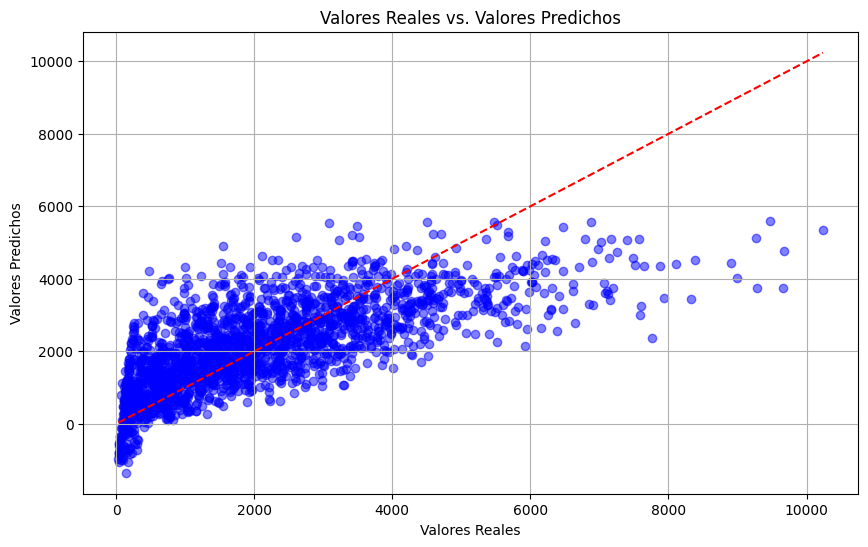

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Valores Predichos')
plt.grid(True)
plt.show()

In [24]:
#Build Lazy Predict Model
from lazypredict.Supervised import LazyRegressor

/# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el objeto LazyRegressor
regressor = LazyRegressor()

# Ajustar el modelo y obtener resultados
models = regressor.fit(X_train, X_test, y_train, y_test)
#Print model performance
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:36<00:00,  1.16it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 2202.365232
(                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
GradientBoostingRegressor                    0.60       0.60  1036.95   
HistGradientBoostingRegressor                0.59       0.59  1057.74   
LGBMRegressor                                0.58       0.59  1059.97   
MLPRegressor                                 0.58       0.58  1068.78   
RandomForestRegressor                        0.56       0.56  1091.54   
ExtraTreesRegressor                          0.55       0.55  1102.75   
XGBRegr

In [54]:
#Creacion Dataset
X_test_df = pd.DataFrame(X_test, columns=X.columns)
X_test_df['predict'] = y_pred

#Guardar DataSet
file_path = 'predicciones.csv'
X_test_df.to_csv(file_path, index=False)